# Code Examples 

## Single Qubit

#### Vectors and matrices in Python

`Qiskit` uses the Python programming language, so before discussing Qiskit specifically it may be helpful to very briefly discuss matrix and vector computations in Python. In Python, matrix and vector computations can be performed using the array class from the `NumPy` library. 

Here is an example of a code that defines two vectors, `ket0` and `ket1`, corresponding to the qubit state vectors $|0\rangle$ and $|1\rangle$, and displays their average.

In [1]:
import numpy as np

ket0 = np.array([1,0])
ket1 = np.array([0,1])

ket0/2 + ket1/2

array([0.5, 0.5])

We can also use array to create matrices that represent operations.

In [2]:
M1 = np.array([ [1, 1], [0, 0] ])
M2 = np.array([ [1, 1], [1, 0] ])

M1/2 + M2/2

array([[1. , 1. ],
       [0.5, 0. ]])

Matrix multiplication (including matrix-vector multiplication as a special case) can be performed using the `matmul` function from `NumPy`:

In [3]:
print("product of M1 with ket0: ", np.matmul(M1,ket0))
print("product of M1 and M2: \n",np.matmul(M1,M2))

product of M1 with ket0:  [1 0]
product of M1 and M2: 
 [[2 1]
 [0 0]]


### States, measurements, and operations in Qiskit

Qiskit includes several classes that allow for states, measurements, and operations to be easily created and manipulated — so starting from scratch and programming everything that is needed to simulate quantum states, measurements, and operations in Python is not required. 

Qiskit's `Statevector` class provides functionality for defining and manipulating quantum state vectors. The following code cell imports the Statevector class and defines a few vectors using it:

In [4]:
from qiskit.quantum_info import Statevector

u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])

The `Statevector` class provides a `draw` method for displaying state vectors, including `latex` and `text` options for different visualizations, as this code cell demonstrates:

In [5]:
display(u.draw('latex'))
display(u.draw('text'))

<IPython.core.display.Latex object>

[0.70710678+0.j,0.70710678+0.j]

In [6]:
display(v.draw('latex'))

<IPython.core.display.Latex object>

The `Statevector` class also includes the `is_valid` method, which checks to see if a given vector is a valid quantum state vector.

In [7]:
w = Statevector([1/3,2/3])

display(v.is_valid())
display(w.is_valid())

True

False

### Simulating measurements using `Statevector`

We will see one way that measurements of quantum states can be simulated in Qiskit, using the measure method from the `Statevector` class.

First, we create a qubit state vector v and then display it. Next, running the `measure` method simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement.

In [8]:
v = Statevector([(1+2.j)/3, -2/3])

v.measure()


('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

Measurement outcomes are probabilistic, so the same method can return different results. For the particular example of the vector v defined above, the measure method defines the quantum state vector after the measurement takes place to be $ \frac{1+2i}{\sqrt{5}} |0\rangle $ or $ - |1\rangle $
depending on the measurement outcome. In both cases the alternatives are, in fact, equivalent — they are said to differ by a global phase because one is equal to the other multiplied by a complex number on the unit circle.

`Statevector` also comes with a `sample_counts` method that allows for the simulation of any number of measurements on the system. For example, the following cell shows the outcome of measuring the vector $v$ 1000 times.

{'0': 5512, '1': 4488}

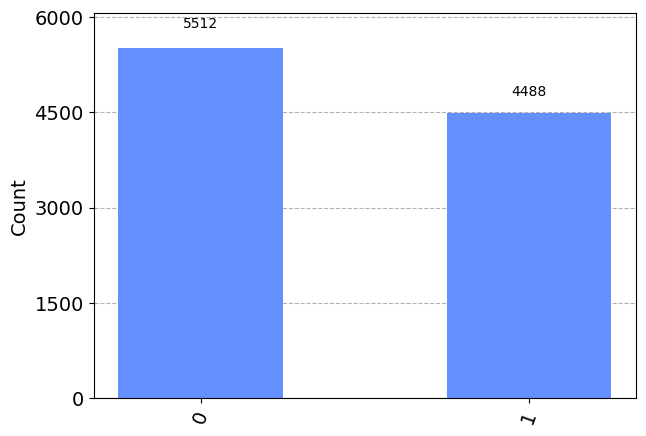

In [9]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

stat = v.sample_counts(10000)
display(stat)
plot_histogram(stat)

### Performing operations with Operator and Statevector

Unitary operations can be defined and performed on state vectors in Qiskit using the Operator class, as in the example that follows.

In [10]:
from qiskit.quantum_info import Operator

t = np.sqrt(2)

X = Operator([[0,1],[1,0]])
Y = Operator([[0,-1.j],[1.j,0]])
Z = Operator([[1,0],[0,-1]])
H = Operator([[1/t, 1/t],[1/t, -1/t]])
S = Operator([[1,0],[0,1.j]])
T = Operator([[1,0],[0,(1+1.j)/t]])

v = Statevector([1,0])

We look at the output of these operations on the statevector $|0\rangle$.

In [11]:
display(v.evolve(X).draw('latex'))
display(v.evolve(Y).draw('latex'))
display(v.evolve(H).draw('latex'))
display(v.evolve(S).draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Looking ahead toward quantum circuits

Quantum circuits won't be formally introduced until Lesson 3, but we can nevertheless experiment with composing qubit unitary operations using Qiskit's `QuantumCircuit` class. In particular, we may define a quantum circuit (which in this case will simply be a sequence of unitary operations performed on a single qubit) as follows.

In [12]:
from qiskit import QuantumCircuit

# initiate an instance of the class
qc = QuantumCircuit(1) ## A QuantumCircuit with 1 qubits

qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.z(0)

qc.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

The operations are applied sequentially, starting on the left and ending on the right in the figure. Let us first initialize a starting quantum state vector and then evolve that state according to the sequence of operations.

In [13]:
ket0 = Statevector([1,0])
v = ket0.evolve(qc)
v.draw('latex')

<IPython.core.display.Latex object>

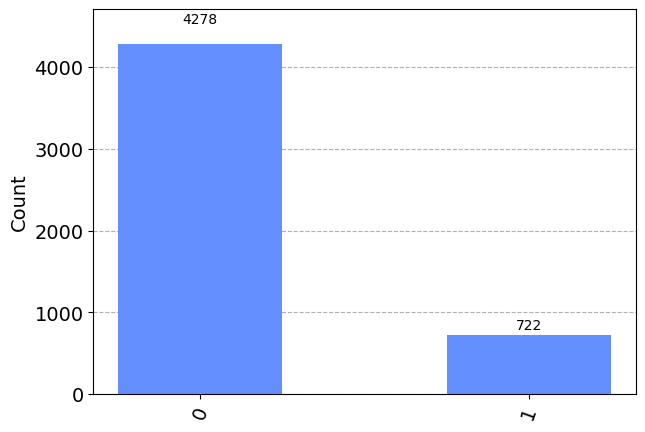

In [14]:
stat = v.sample_counts(5000)
plot_histogram(stat)

## Multiple Qubits

We learned about Qiskit's `Statevector` and `Operator` classes, and used them to simulate quantum systems. In this section, we'll use them to explore the behavior of multiple systems. We'll start by importing these classes.

### Tensor Products

The `Statevector` class has a `tensor` method which returns the tensor product of itself and another `Statevector`. For example, below we create two state vectors representing $|0\rangle$ and $|1\rangle$, and use the tensor method to create a new vector, $|0\rangle \otimes |1\rangle$.

In [15]:
ket0 = Statevector([1,0])
ket1 = Statevector([0,1])

ket01 = ket0.tensor(ket1)
display(ket01.draw('latex'))

<IPython.core.display.Latex object>

In another example below, we create state vectors representing the $|-\rangle$ and $\frac{1}{\sqrt{2}} (|0\rangle + i|1\rangle)$ states, and combine them to create a new state vector. We'll assign this new vector to the variable `psi`.

In [16]:
# Another quick way to define the common states

zero = Statevector.from_label('0')
one = Statevector.from_label('1')
plus = Statevector.from_label('+')
minus = Statevector.from_label('-')

i_state = 1/np.sqrt(2) * (zero + 1.j * one)
psi = minus.tensor(i_state)

psi.draw('latex')

<IPython.core.display.Latex object>

The `Operator` class also has a `tensor` method. In the example below, we create the  and  gates and display their tensor product.

In [17]:
X.tensor(Z)

Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

We can then treat these compound states and operations as we did single systems in the previous page. For example, in the cell below we use the state psi we defined above, and calculate $(Z\otimes X)| \psi \rangle$.

Note: You can also use the ^ operator to tensor two operators together.

In [18]:
psi_1 = psi.evolve(T^X)

display(psi_1.draw('latex'))

<IPython.core.display.Latex object>

Below, we create a $\mathbf{CNOT}$ operator and calculate $\mathbf{CNOT} |\psi \rangle$.

In [19]:
CNOT = Operator([ [1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0] ])

psi_2 = psi.evolve(CNOT)
display(psi_2.draw('latex'))

<IPython.core.display.Latex object>

**Challenge**: Can you create each of the Bell states using only single-qubit state vectors and the $\mathbf{CNOT}$ operator?

In [20]:
# SOLUTION
phi_plus = plus.tensor(zero).evolve(CNOT)
phi_minus = minus.tensor(zero).evolve(CNOT)
psi_plus = plus.tensor(one).evolve(CNOT)
psi_minus = minus.tensor(one).evolve(CNOT)

display(phi_plus.draw('latex'))
display(phi_minus.draw('latex'))
display(psi_plus.draw('latex'))
display(psi_minus.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Partial Measurements

In the previous page, we used the `measure` method to simulate a measurement of the quantum state vector. This method returns two items: the simulated measurement result, and the new `Statevector` given this measurement.

By default, `measure` measures all qubits in the state vector, but we can provide a list of integers to only measure the qubits at those indices. To demonstrate, the cell below creates the state $$ W = \frac{1}{\sqrt{3}} (|001\rangle + |010\rangle + |001\rangle).$$

In [21]:
W = Statevector([0,1,1,0,1,0,0,0]/np.sqrt(3))
display(W.draw('latex'))

<IPython.core.display.Latex object>

The cell below simulates a measurement on the rightmost qubit (which has index 0). The other two qubits are not measured.

In [22]:
result, new_statevector = W.measure([0])
print(f"Measured: {result} \n New Statevector:")
display(new_statevector.draw('latex'))

Measured: 0 
 New Statevector:


<IPython.core.display.Latex object>

In [23]:
result, new_statevector = W.measure([1])
print(f"Measured: {result} \n New Statevector:")
display(new_statevector.draw('latex'))

Measured: 0 
 New Statevector:


<IPython.core.display.Latex object>

**Explore**: Say you applied an $H$-gate to the rightmost qubit of the $W$-state before measuring it. What would the probabilities of the two outcomes be? And what would the resulting state of the other qubits be for each of these outcomes?

In [24]:
I = Operator([[1,0],[0,1]])
W1 = W.evolve(I^I^H)

display(W1.draw('latex'))

<IPython.core.display.Latex object>

In [25]:
result, new_statevector = W1.measure([0])
print(f"Measured: {result} \n New Statevector:")
display(new_statevector.draw('latex'))

Measured: 1 
 New Statevector:


<IPython.core.display.Latex object>

In [26]:
W1.probabilities([0])

array([0.5, 0.5])

In [27]:
import qiskit.tools.jupyter
%qiskit_version_table

## Quantum Circuits

In the quantum circuit model, wires represent qubits and gates represent operations acting on these qubits. We'll focus for now on operations we have encountered so far, namely `unitary operations` and `standard basis measurements`. As we learn about other sorts of quantum operations and measurements, we'll enhance our model accordingly.

Here is an example of a quantum circuit.

In [28]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
qc.h(0)
qc.t(0)
qc.draw()

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

The default names for qubits in Qiskit are $\mathbf{q_0}$, $\mathbf{q_1}$, $\mathbf{q_2}$, etc., and when there is just a single qubit like in our example, the default name is $\mathbf{q}$. If we wish to choose our own name we can do this using the `QuantumRegister` class like this:

In [29]:
from qiskit import QuantumRegister
u = QuantumRegister(1, "u")
qc = QuantumCircuit(u)
qc.y(0)
qc.s(0)
qc.h(0)
qc.t(0)
qc.x(0)
qc.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
u: ┤ Y ├┤ S ├┤ H ├┤ T ├┤ X ├
   └───┘└───┘└───┘└───┘└───┘

**Ordering of qubits in quantum circuits**: Throughout this textbook (and in Qiskit) the topmost qubit in a circuit has index 0, and corresponds to the rightmost position in a Cartesian or tensor product. The second-to-top qubit has index 1, and corresponds to the position second-from-right in a Cartesian or tensor product, and so on, down to the bottommost qubit, which has the highest index, and corresponds to the leftmost position in a Cartesian or tensor product.

So, for example, when we refer to the qubit in the zeroth position, we're referring to the topmost qubit in a circuit diagram or the rightmost qubit in the expression of a quantum state vector; the qubit in the first position is second-from-top in a circuit diagram or second from right in a quantum state vector; and so on. This indexing convention is known as little-endian indexing, because the indexes start at the "little end" when we think about the significance of bits in binary representations of numbers.

The following circuit has two qubits $X$ and $Y$. We apply the Hadamard gate $H$ on $Y$ and then the $\mathbf{CNOT}$ gate. There are also two classical bits, $A$ and $B$, and two measurement gates. 

In [34]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

X = QuantumRegister(1, "x")
Y = QuantumRegister(1, "y")
A = ClassicalRegister(1, "a")
B = ClassicalRegister(1, "b")

qc = QuantumCircuit(Y,X,B,A)
qc.h(Y)
qc.cx(Y,X)

qc.measure(Y,B)
qc.measure(X,A)
qc.draw()

┌───┐     ┌─┐   
  y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  x: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
b: 1/═══════════╩══╬═
                0  ║ 
a: 1/══════════════╩═
                   0

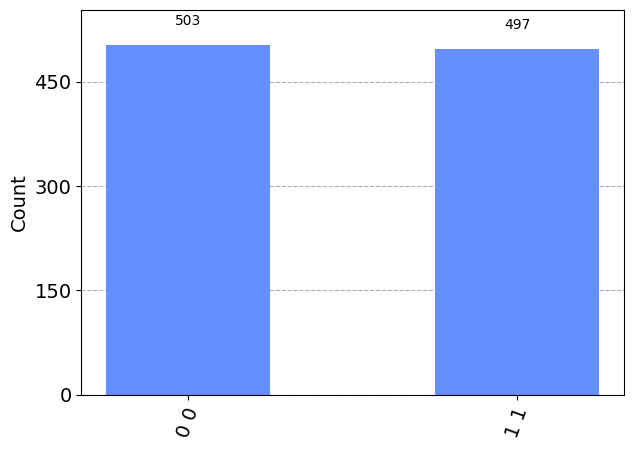

In [39]:
from qiskit import transpile
from qiskit_aer import AerSimulator

simulator = AerSimulator()
qc_simulator = simulator.run(transpile(qc,simulator), shots=1000)
statistics = qc_simulator.result().get_counts()
plot_histogram(statistics)

Another way to run a quantum circuit that returns a counts dictionary of measurement outcomes.

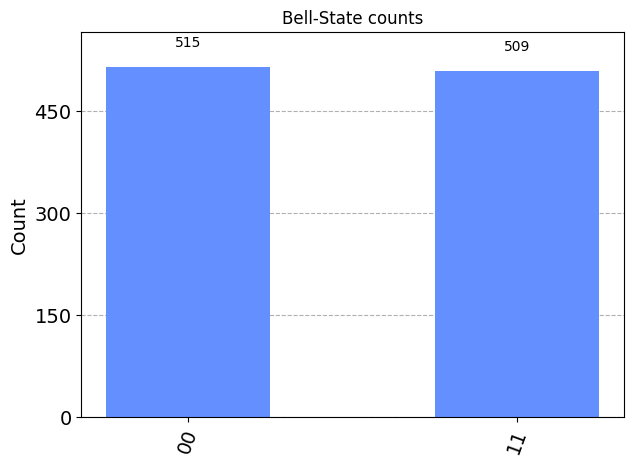

In [37]:
# Circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

from qiskit import Aer
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

The `QasmSimulator` also supports returning a list of measurement outcomes for each individual shot. This is enabled by setting the keyword argument `memory=True` in the `run`.

In [40]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
memory

['11', '11', '11', '00', '00', '11', '11', '11', '00', '00']

The `Aer` provider contains a variety of high performance simulator backends for a variety of simulation methods. The available backends on the current system can be viewed using `Aer.backends()`. Here is some more information on the types of Aer simulators https://medium.com/qiskit/qiskit-aer-d09d0fac7759 

In [41]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

### Inner Products, Orthonormality, and Projections

To better prepare ourselves to explore the capabilities and limitations of quantum circuits, we now introduce some additional mathematical concepts — namely the *inner product* between vectors (and its connection to the Euclidean norm), the notions of *orthogonality* and *orthonormality* for sets of vectors, and *projection* matrices, which will allow us to introduce a handy generalization of standard basis measurements.

#### Inner Products

An arbitrary column vector is written as a ket $|\psi \rangle$. The corresponding bra vector is the *conjugate transpose* of this vector and written as $\langle \psi |$. Using the classical state $\Sigma$ in mind, we can write $|\psi \rangle$ and $\langle \psi |$ as $$ | \psi \rangle = \sum_{a\in \Sigma} \alpha_a |a\rangle \quad \text{and} \quad  \langle \psi | = \sum_{a\in \Sigma} \overline{\alpha_a} \langle a |.$$ 
The *inner product* of $|\psi \rangle =\sum_{a\in \Sigma} \alpha_a |a\rangle $ and $|\phi \rangle = \sum_{b\in \Sigma} \beta_b |b\rangle $ is given by $$ \langle \psi | \phi \rangle = \sum_{a\in \Sigma} \overline{\alpha_a} \beta_a. $$
Let us now collect together some basic facts about inner products of vectors.

- Relationship to the Euclidean norm: $ \langle \psi |\psi \rangle = \sum_{a\in \Sigma} \overline{\alpha_a} \alpha_a = \sum{a\in \Sigma} |\alpha_a|^2 = \| |\psi \rangle \|^2$.
- Conjugate symmetry: $\overline{\langle \psi | \phi \rangle} = \langle \phi | \psi \rangle $.
- Linearity (conjugate linearity): Let $|\psi \rangle = \alpha_1 |\psi_1 \rangle + \alpha_2 |\psi_2 \rangle$ and $| \phi \rangle = \beta_1 |\phi_1 \rangle + \beta_2 |\phi_2 \rangle$. Then $$ \langle \psi | \phi \rangle = \overline{\alpha_1} \langle \psi_1|\phi \rangle + \overline{\alpha_2} \langle \psi_2|\phi \rangle $$ 
$$\langle \psi | \phi \rangle = \beta_1 \langle \psi |\phi_1 \rangle + \beta_2 \langle \psi |\phi_2 \rangle $$
- The Cauchy–Schwarz inequality: $\langle \psi | \phi \rangle \le \| | \psi \rangle \| \| | \phi \rangle \| $.

#### Orthogonal and Orthonormal Sets

Two vectors $|\phi \rangle$ and $|\psi \rangle$ are *orthogonal* if their inner product is zero: $\langle \psi |\phi \rangle = 0$. A set of vectors $\{ |\phi_1 \rangle ,|\phi_2 \rangle, \dots ,|\phi_n \rangle  \}$ is an *orthogonal set* if $\langle \phi_i |\phi_j \rangle = 0$ for all $i\neq j$. The set is *orthonormal* if $$ \langle \phi_i |\phi_j \rangle = \begin{cases} 1 & i=j \\ 0 & i\neq j \end{cases}$$ for all $i,j=1,2\dots ,n$.

A set of vectors $\{ |\phi_1 \rangle ,|\phi_2 \rangle, \dots ,|\phi_n \rangle  \}$ is an *orthonormal basis* if the set is *orthonormal* and forms a basis. For example for any classical state set $\Sigma$, the set of all standard basis vectors $\{ |a\rangle : a\in \Sigma \}$ is an orthonormal basis.